**install the necessary libraries**

In [20]:
#install the necessary libraries
! pip install numpy


In [ ]:
! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 31.4 MB/s eta 0:00:00


In [ ]:
import lazypredict

**Install Miniconda**

In [2]:
# Download and install Miniconda
!wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O miniconda.sh
!bash miniconda.sh -bfp /usr/local

# Add conda to your PATH
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

# Update conda
!conda update -q -y conda

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.
/bin/bash: miniconda.sh: No such file or directory


Solving environment: ...working... done

# All requested packages already installed.



**Install CD-HIT**

In [9]:
! conda install -c bioconda cd-hit -y


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/bioconda/noarch/repodata.json>
Elapsed: -


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.




An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/bioconda/noarch'




**Read Data**

In [1]:
import pandas as pd
import os
import requests

#Assign the positive and negative files
positive_file_url = "https://raw.githubusercontent.com/SanaeEsskhayry/data/master/AMR_protein_sequences.fasta"
negative_file_url = "https://raw.githubusercontent.com/SanaeEsskhayry/data/master/Sen_protein_sequences.fasta"

#Create a vairbale:filename dictionary
url_dict = {positive_file_url:'resistant_sequences.fasta', negative_file_url:'sensitive_sequences.fasta'}

#Loop through the variables in the dictionary and save the contents as filenames in the dictionary
for url, filename in url_dict.items():
  r = requests.get(url)
  with open (f'{filename}', 'wb') as f:
    f.write(r.content)

In [2]:
import re
from Bio import SeqIO

# Function to find and return the ambiguous characters along with their positions in a protein sequence
def find_ambiguous_characters(sequence):
    ambiguous_pattern = re.compile(r"[^ACDEFGHIKLMNPQRSTVWY]")
    matches = [(match.group(), match.start()) for match in ambiguous_pattern.finditer(sequence)]
    return matches

# Read the FASTA file and check for ambiguous characters
def check_ambiguous_characters(fasta_file):
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence_id = record.id
        sequence = str(record.seq)
        ambiguous_characters = find_ambiguous_characters(sequence)
        if ambiguous_characters:
            print(f"Ambiguous characters found in sequence {sequence_id}: {sequence}")
            for char, position in ambiguous_characters:
                print(f"Ambiguous character '{char}' found at position {position}")

# Load the FASTA file
fasta_file = "sensitive_sequences.fasta"

# Check for ambiguous characters in the sequences
check_ambiguous_characters(fasta_file)


Ambiguous characters found in sequence sp|Q9PLT8.2|RECB_CHLMU: MSSFDIFSPTTSVSGKFFLEASAGTGKTFTIEQVILRSLLEGNVEQTKNILVVTFTNAATNELKLRIQESLKQALTLFSQALSHPETPLPPYVSSQETKVKQLYXKXRNSLATLDEMNIFTIHGLCRFTLEQHFPWVQPIHPSSMFSEPQTIQQYILDYLRQNSWENVLSPKQYAFLSYHHRATTQQTRHLADRLLQDYASTPNLALPPLSITLQKVKNWSSQYKHLSPLSLEELQDFSLRFKQSDLPIDRELPDFVKQFETDPNSLDILFFPGMVQKFQEENRNKKKLGPPFSPLDPFLKDWLLIAQPFCQKEPIFHTLLKSVQQHLKTYCAQSYSHDESIATLESLLAQNDHVVSQLRKQFQLVLIDEFQDTDKRQWKIFSKLFASPDYSGSLFLIGDPKQSIYEWRNADLPTYLQAKNSFPKESQLILDTNYRSTPQLMQALNHLFSLPSPFLETPQTILYHPLQSKGSASTSYSEFRPIHFFTTQDSQEEALWISKTASYLRSTFAIPFGNMAVLVQDYPQALKLITHSTIPMAYCKEKRIFDRTESPYLLILLLEALLYPENQQKIQAILLSRFFHLSATDIHQHLKIFSSLFFMLNTYLHQYSLLATFYKLMGETVFSQTIGETLLQTPLGDIIFQELEELCLYLDKTTENPHHKLFHLINILDTGKYDEELSFSSQSNDDNVLKITTVHSSKGLEYDVVFCSSLNKVKEKSPSVHMREMYVACTRAKKFLFIPFSSIEKRLQSNKKVSALANYANITQHDNIPHLVETLTASHPEFFSSGTQPPESNISIFSEPLPEQEFFSLPILSSQPIYSFSSTTESQYFTEPFQEISSSSLFPGGSLTGTLIHKLLESLSGNFNASLEEITHKAQTLLKNTILEGFESIISEKIYTAFSTKLPFVSGSFALKDVHPYNIRVEETFLLQENGELWQG

In [5]:
# Function to check if a sequence has ambiguous characters
def has_ambiguous_characters(sequence):
    return bool(find_ambiguous_characters(sequence))

# Read the FASTA file and filter out sequences with ambiguous characters
def filter_ambiguous_sequences(input_fasta, output_fasta):
    sequences_to_keep = []

    for record in SeqIO.parse(input_fasta, "fasta"):
        sequence = str(record.seq)
        if not has_ambiguous_characters(sequence):
            sequences_to_keep.append(record)

    # Write the filtered sequences to a new FASTA file
    with open(output_fasta, "w") as output_file:
        SeqIO.write(sequences_to_keep, output_file, "fasta")

# Input and output FASTA file names
input_fasta_file = "resistant_sequences.fasta"
output_fasta_file = "filtered_resistant_sequences.fasta"

# Filter out sequences with ambiguous characters
filter_ambiguous_sequences(input_fasta_file, output_fasta_file)

**Run CD-HIT**

In [7]:
#Process the files with cd-hit
os.system("cd-hit -i filtered_resistant_sequences.fasta -o resistant_cdhit.txt -c 0.99")
os.system("cd-hit -i filtered_sensitive_sequences.fasta -o sensitive_cdhit.txt -c 0.99")

1

**Features generation for resistant sequences**

In [21]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio import SeqIO

fasta_file = "resistant_cdhit.txt"
results = [ ]

for i, record in enumerate(SeqIO.parse(fasta_file, "fasta")):

    analysed_protein = ProteinAnalysis(record.seq)
    # Calculate properties
    charge_at_pH = analysed_protein.charge_at_pH(7)
    #1-
    molecular_weight = analysed_protein.molecular_weight()
    #2-
    hydrophobicity = analysed_protein.gravy()
    #3-
    isoelectric_point = analysed_protein.isoelectric_point()
    #4-
    aromaticity = analysed_protein.aromaticity()
    #5-
    instability_index = analysed_protein.instability_index()
    #6-
    secondary_structure_fraction = analysed_protein.secondary_structure_fraction()
    #7-
    molar_extinction_coefficient = analysed_protein.molar_extinction_coefficient()
    #8-
    flexibility = analysed_protein.flexibility()
    # 9-
    get_amino_acids_percent = analysed_protein.get_amino_acids_percent()

    # Store the results
    results.append({
          "Sequence": i+1,
          "charge at pH =7" : charge_at_pH,
          "Molecular Weight": molecular_weight,
          "Hydrophobicity": hydrophobicity,
          "Isoelectric Point": isoelectric_point,
          "Aromaticity": aromaticity,
          "Instability Index": instability_index,
          "secondary structure fraction" : secondary_structure_fraction,
          "Molar extinction coefficient" : molar_extinction_coefficient,
          "Flexibility" : sum(flexibility) / len(flexibility),
          "Amino acids percent" : get_amino_acids_percent
    })



# Display results for each sequence
for i, result in enumerate(results):
    print(f"Sequence {i + 1} Results:")
    for key, value in result.items():
      print(f"{key}: {value}")
    print()

Sequence 1 Results:
Sequence: 1
charge at pH =7: 10.750832711976635
Molecular Weight: 17749.53639999999
Hydrophobicity: -0.14787878787878764
Isoelectric Point: 9.873800468444824
Aromaticity: 0.030303030303030304
Instability Index: 18.701818181818187
secondary structure fraction: (0.28484848484848485, 0.24848484848484848, 0.2787878787878788)
Molar extinction coefficient: (0, 125)
Flexibility: 1.0048467643467645
Amino acids percent: {'A': 0.09090909090909091, 'C': 0.01818181818181818, 'D': 0.05454545454545454, 'E': 0.048484848484848485, 'F': 0.030303030303030304, 'G': 0.09696969696969697, 'H': 0.01818181818181818, 'I': 0.05454545454545454, 'K': 0.10303030303030303, 'L': 0.11515151515151516, 'M': 0.024242424242424242, 'N': 0.06060606060606061, 'P': 0.024242424242424242, 'Q': 0.012121212121212121, 'R': 0.06666666666666667, 'S': 0.06666666666666667, 'T': 0.030303030303030304, 'V': 0.08484848484848485, 'W': 0.0, 'Y': 0.0}

Sequence 2 Results:
Sequence: 2
charge at pH =7: 5.6403339251112055
M

Sequence: 107
charge at pH =7: 0.43027506683034744
Molecular Weight: 40323.1894
Hydrophobicity: -0.07562326869806087
Isoelectric Point: 7.155597114562989
Aromaticity: 0.08310249307479226
Instability Index: 43.331578947368435
secondary structure fraction: (0.32409972299168976, 0.21052631578947367, 0.24930747922437674)
Molar extinction coefficient: (29910, 30285)
Flexibility: 0.9989463947510814
Amino acids percent: {'A': 0.07202216066481995, 'C': 0.019390581717451522, 'D': 0.038781163434903045, 'E': 0.06371191135734072, 'F': 0.04986149584487535, 'G': 0.04709141274238227, 'H': 0.030470914127423823, 'I': 0.0997229916897507, 'K': 0.08587257617728532, 'L': 0.09418282548476455, 'M': 0.019390581717451522, 'N': 0.0332409972299169, 'P': 0.0443213296398892, 'Q': 0.060941828254847646, 'R': 0.01662049861495845, 'S': 0.08587257617728532, 'T': 0.05817174515235457, 'V': 0.04709141274238227, 'W': 0.008310249307479225, 'Y': 0.024930747922437674}

Sequence 108 Results:
Sequence: 108
charge at pH =7: 6.27

Hydrophobicity: 0.03624454148471619
Isoelectric Point: 6.044906425476075
Aromaticity: 0.048034934497816595
Instability Index: 28.722052401746723
secondary structure fraction: (0.31004366812227074, 0.22270742358078602, 0.26419213973799127)
Molar extinction coefficient: (20400, 20900)
Flexibility: 0.9981774578428251
Amino acids percent: {'A': 0.08296943231441048, 'C': 0.017467248908296942, 'D': 0.0611353711790393, 'E': 0.0611353711790393, 'F': 0.024017467248908297, 'G': 0.10043668122270742, 'H': 0.024017467248908297, 'I': 0.07423580786026202, 'K': 0.056768558951965066, 'L': 0.08951965065502183, 'M': 0.03056768558951965, 'N': 0.03056768558951965, 'P': 0.03275109170305677, 'Q': 0.026200873362445413, 'R': 0.05240174672489083, 'S': 0.05895196506550218, 'T': 0.05458515283842795, 'V': 0.0982532751091703, 'W': 0.002183406113537118, 'Y': 0.021834061135371178}

Sequence 208 Results:
Sequence: 208
charge at pH =7: 15.657621101987152
Molecular Weight: 11420.418399999988
Hydrophobicity: -0.548484848

secondary structure fraction: (0.328125, 0.2265625, 0.283203125)
Molar extinction coefficient: (20400, 20900)
Flexibility: 0.9961574363343743
Amino acids percent: {'A': 0.0859375, 'C': 0.017578125, 'D': 0.044921875, 'E': 0.052734375, 'F': 0.046875, 'G': 0.05078125, 'H': 0.041015625, 'I': 0.06640625, 'K': 0.060546875, 'L': 0.134765625, 'M': 0.009765625, 'N': 0.025390625, 'P': 0.05859375, 'Q': 0.0390625, 'R': 0.037109375, 'S': 0.091796875, 'T': 0.056640625, 'V': 0.05859375, 'W': 0.001953125, 'Y': 0.01953125}

Sequence 266 Results:
Sequence: 266
charge at pH =7: 0.774338924879082
Molecular Weight: 32716.20890000004
Hydrophobicity: -0.05482758620689645
Isoelectric Point: 7.252393913269044
Aromaticity: 0.10344827586206896
Instability Index: 43.916241379310335
secondary structure fraction: (0.3448275862068966, 0.2310344827586207, 0.2517241379310345)
Molar extinction coefficient: (31400, 31775)
Flexibility: 0.9918113031689554
Amino acids percent: {'A': 0.06551724137931035, 'C': 0.020689655172

Molecular Weight: 29644.693300000017
Hydrophobicity: 0.0007434944237918916
Isoelectric Point: 5.713876152038575
Aromaticity: 0.07434944237918215
Instability Index: 49.01561338289962
secondary structure fraction: (0.3271375464684015, 0.2379182156133829, 0.26765799256505574)
Molar extinction coefficient: (23950, 24200)
Flexibility: 0.997682234432234
Amino acids percent: {'A': 0.07806691449814127, 'C': 0.01486988847583643, 'D': 0.048327137546468404, 'E': 0.06319702602230483, 'F': 0.04460966542750929, 'G': 0.06319702602230483, 'H': 0.022304832713754646, 'I': 0.06691449814126393, 'K': 0.04460966542750929, 'L': 0.10408921933085502, 'M': 0.022304832713754646, 'N': 0.03717472118959108, 'P': 0.05204460966542751, 'Q': 0.04460966542750929, 'R': 0.048327137546468404, 'S': 0.08550185873605948, 'T': 0.048327137546468404, 'V': 0.08178438661710037, 'W': 0.011152416356877323, 'Y': 0.01858736059479554}

Sequence 364 Results:
Sequence: 364
charge at pH =7: 3.860159204023075
Molecular Weight: 18044.143299

Molecular Weight: 15949.579299999992
Hydrophobicity: 0.38231292517006765
Isoelectric Point: 9.159619712829592
Aromaticity: 0.08843537414965985
Instability Index: 43.39394557823128
secondary structure fraction: (0.3673469387755102, 0.24489795918367346, 0.2585034013605442)
Molar extinction coefficient: (15470, 15720)
Flexibility: 0.9896432884748104
Amino acids percent: {'A': 0.08843537414965986, 'C': 0.027210884353741496, 'D': 0.02040816326530612, 'E': 0.04081632653061224, 'F': 0.05442176870748299, 'G': 0.08843537414965986, 'H': 0.027210884353741496, 'I': 0.08163265306122448, 'K': 0.06802721088435375, 'L': 0.10884353741496598, 'M': 0.02040816326530612, 'N': 0.034013605442176874, 'P': 0.034013605442176874, 'Q': 0.047619047619047616, 'R': 0.027210884353741496, 'S': 0.08843537414965986, 'T': 0.02040816326530612, 'V': 0.08843537414965986, 'W': 0.013605442176870748, 'Y': 0.02040816326530612}

Sequence 452 Results:
Sequence: 452
charge at pH =7: -0.9879046213187923
Molecular Weight: 32338.5952

Molecular Weight: 24845.44250000002
Hydrophobicity: -0.07741935483870963
Isoelectric Point: 8.938751029968266
Aromaticity: 0.1152073732718894
Instability Index: 53.43875576036866
secondary structure fraction: (0.3686635944700461, 0.21198156682027652, 0.29493087557603687)
Molar extinction coefficient: (24870, 24995)
Flexibility: 0.9964323489010989
Amino acids percent: {'A': 0.06451612903225806, 'C': 0.009216589861751152, 'D': 0.03225806451612903, 'E': 0.06912442396313365, 'F': 0.05069124423963134, 'G': 0.04608294930875576, 'H': 0.027649769585253458, 'I': 0.05069124423963134, 'K': 0.059907834101382486, 'L': 0.1382488479262673, 'M': 0.02304147465437788, 'N': 0.018433179723502304, 'P': 0.03686635944700461, 'Q': 0.041474654377880185, 'R': 0.059907834101382486, 'S': 0.11059907834101383, 'T': 0.03225806451612903, 'V': 0.06451612903225806, 'W': 0.004608294930875576, 'Y': 0.059907834101382486}

Sequence 533 Results:
Sequence: 533
charge at pH =7: -7.409565888534719
Molecular Weight: 5897.595100

Isoelectric Point: 9.28565540313721
Aromaticity: 0.07588075880758807
Instability Index: 37.56639566395663
secondary structure fraction: (0.3414634146341463, 0.22493224932249323, 0.24932249322493227)
Molar extinction coefficient: (40450, 40950)
Flexibility: 0.9958214285714286
Amino acids percent: {'A': 0.06504065040650407, 'C': 0.02168021680216802, 'D': 0.051490514905149054, 'E': 0.051490514905149054, 'F': 0.04607046070460705, 'G': 0.0921409214092141, 'H': 0.02981029810298103, 'I': 0.06233062330623306, 'K': 0.06504065040650407, 'L': 0.11382113821138211, 'M': 0.018970189701897018, 'N': 0.024390243902439025, 'P': 0.04065040650406504, 'Q': 0.02981029810298103, 'R': 0.06775067750677506, 'S': 0.06775067750677506, 'T': 0.032520325203252036, 'V': 0.08943089430894309, 'W': 0.016260162601626018, 'Y': 0.013550135501355014}

Sequence 617 Results:
Sequence: 617
charge at pH =7: -0.2139170340708212
Molecular Weight: 43136.61340000004
Hydrophobicity: 0.8495145631067972
Isoelectric Point: 6.8758924484

Molecular Weight: 19455.12240000001
Hydrophobicity: 0.06257309941520471
Isoelectric Point: 7.702217674255372
Aromaticity: 0.13450292397660818
Instability Index: 26.79473684210524
secondary structure fraction: (0.391812865497076, 0.2222222222222222, 0.26900584795321636)
Molar extinction coefficient: (43890, 44140)
Flexibility: 0.9880949441504998
Amino acids percent: {'A': 0.06432748538011696, 'C': 0.023391812865497075, 'D': 0.04678362573099415, 'E': 0.03508771929824561, 'F': 0.04093567251461988, 'G': 0.07017543859649122, 'H': 0.03508771929824561, 'I': 0.03508771929824561, 'K': 0.04093567251461988, 'L': 0.15204678362573099, 'M': 0.017543859649122806, 'N': 0.023391812865497075, 'P': 0.017543859649122806, 'Q': 0.04678362573099415, 'R': 0.04678362573099415, 'S': 0.1111111111111111, 'T': 0.029239766081871343, 'V': 0.07017543859649122, 'W': 0.029239766081871343, 'Y': 0.06432748538011696}

Sequence 716 Results:
Sequence: 716
charge at pH =7: -19.804788765154
Molecular Weight: 107101.9056000009

Molar extinction coefficient: (14440, 14815)
Flexibility: 0.9938191933916422
Amino acids percent: {'A': 0.08661417322834646, 'C': 0.027559055118110236, 'D': 0.031496062992125984, 'E': 0.05511811023622047, 'F': 0.03937007874015748, 'G': 0.05905511811023622, 'H': 0.031496062992125984, 'I': 0.07480314960629922, 'K': 0.05905511811023622, 'L': 0.11811023622047244, 'M': 0.023622047244094488, 'N': 0.023622047244094488, 'P': 0.047244094488188976, 'Q': 0.023622047244094488, 'R': 0.06692913385826772, 'S': 0.06692913385826772, 'T': 0.07874015748031496, 'V': 0.05905511811023622, 'W': 0.003937007874015748, 'Y': 0.023622047244094488}

Sequence 799 Results:
Sequence: 799
charge at pH =7: 8.850243152148856
Molecular Weight: 51211.44650000002
Hydrophobicity: 0.8203862660944216
Isoelectric Point: 9.02681484222412
Aromaticity: 0.13733905579399142
Instability Index: 27.90817596566523
secondary structure fraction: (0.4334763948497854, 0.2381974248927039, 0.2918454935622318)
Molar extinction coefficient: (8

Molecular Weight: 30259.53530000004
Hydrophobicity: -0.06410256410256451
Isoelectric Point: 7.743539619445801
Aromaticity: 0.06227106227106227
Instability Index: 51.641794871794865
secondary structure fraction: (0.32234432234432236, 0.22710622710622713, 0.315018315018315)
Molar extinction coefficient: (8940, 9065)
Flexibility: 1.0011175595238102
Amino acids percent: {'A': 0.07692307692307693, 'C': 0.007326007326007326, 'D': 0.03663003663003663, 'E': 0.0695970695970696, 'F': 0.040293040293040296, 'G': 0.03663003663003663, 'H': 0.014652014652014652, 'I': 0.07326007326007326, 'K': 0.06227106227106227, 'L': 0.15384615384615385, 'M': 0.014652014652014652, 'N': 0.02564102564102564, 'P': 0.04395604395604396, 'Q': 0.054945054945054944, 'R': 0.047619047619047616, 'S': 0.12087912087912088, 'T': 0.06593406593406594, 'V': 0.03296703296703297, 'W': 0.0, 'Y': 0.02197802197802198}

Sequence 886 Results:
Sequence: 886
charge at pH =7: 1.459386299247651
Molecular Weight: 17539.97859999999
Hydrophobicit

Flexibility: 0.9993788056206089
Amino acids percent: {'A': 0.06050955414012739, 'C': 0.009554140127388535, 'D': 0.041401273885350316, 'E': 0.07961783439490445, 'F': 0.0732484076433121, 'G': 0.044585987261146494, 'H': 0.01592356687898089, 'I': 0.0732484076433121, 'K': 0.06050955414012739, 'L': 0.14331210191082802, 'M': 0.022292993630573247, 'N': 0.03503184713375796, 'P': 0.01910828025477707, 'Q': 0.05732484076433121, 'R': 0.054140127388535034, 'S': 0.1178343949044586, 'T': 0.03184713375796178, 'V': 0.03503184713375796, 'W': 0.006369426751592357, 'Y': 0.01910828025477707}

Sequence 953 Results:
Sequence: 953
charge at pH =7: 15.805474915896376
Molecular Weight: 45027.32830000003
Hydrophobicity: -0.24139650872818005
Isoelectric Point: 9.759949302673338
Aromaticity: 0.06234413965087282
Instability Index: 55.6915211970075
secondary structure fraction: (0.3092269326683292, 0.25436408977556113, 0.2119700748129676)
Molar extinction coefficient: (37930, 38055)
Flexibility: 0.9992755102040826
Am

Sequence 999 Results:
Sequence: 999
charge at pH =7: -11.609150737160753
Molecular Weight: 32978.96120000009
Hydrophobicity: -0.15913621262458483
Isoelectric Point: 5.302532386779785
Aromaticity: 0.07308970099667775
Instability Index: 27.282093023255804
secondary structure fraction: (0.2823920265780731, 0.21594684385382062, 0.29900332225913623)
Molar extinction coefficient: (13410, 13660)
Flexibility: 1.0004937622309198
Amino acids percent: {'A': 0.10299003322259136, 'C': 0.013289036544850499, 'D': 0.059800664451827246, 'E': 0.06976744186046512, 'F': 0.04318936877076412, 'G': 0.05647840531561462, 'H': 0.03322259136212625, 'I': 0.06312292358803986, 'K': 0.05647840531561462, 'L': 0.09634551495016612, 'M': 0.029900332225913623, 'N': 0.04318936877076412, 'P': 0.029900332225913623, 'Q': 0.029900332225913623, 'R': 0.03322259136212625, 'S': 0.08637873754152824, 'T': 0.07308970099667775, 'V': 0.04983388704318937, 'W': 0.0, 'Y': 0.029900332225913623}

Sequence 1000 Results:
Sequence: 1000
charg

In [22]:
import pandas as pd


# Process the data to create separate columns for Amino Acids Percent, Molar Extinction Coefficient, and Secondary Structure Fraction
for entry in results:
    # Convert Amino Acids Percent dictionary into separate columns
    for aa, percent in entry['Amino acids percent'].items():
        entry[f'{aa}'] = percent

    # Separate Molar Extinction Coefficient into separate columns
    entry['MEC_reduced cysteines'], entry['MEC_disulfid bridges'] = entry['Molar extinction coefficient']

    # Separate Secondary Structure Fraction into separate columns
    entry['SSF_Helix'], entry['SSF_Turn'], entry['SSF_Sheet'] = entry['secondary structure fraction']

# Convert 'results' into a DataFrame
df = pd.DataFrame(results)

# Drop the original columns that have been separated
df.drop(['Amino acids percent', 'Molar extinction coefficient', 'secondary structure fraction'], axis=1, inplace=True)

# Print the DataFrame
df


Sequence  charge at pH =7  Molecular Weight  Hydrophobicity  \
0            1        10.750833        17749.5364       -0.147879   
1            2         5.640334        21796.1189        1.069802   
2            3         2.681455        22524.9949        1.000990   
3            4         3.692047        22615.1605        0.987624   
4            5         3.680456        22493.0392        1.024257   
...        ...              ...               ...             ...   
1059      1060        12.983504        32865.9708        0.055782   
1060      1061         2.492773        22700.1055        0.994554   
1061      1062        -0.171116        15654.8495        0.140690   
1062      1063         0.995252        21045.1693       -0.032461   
1063      1064       -22.412161       140270.4629       -0.238099   

      Isoelectric Point  Aromaticity  Instability Index  Flexibility  \
0              9.873800     0.030303          18.701818     1.004847   
1              9.386226     0.084158          33.470297     0.978626   
2              9.297840     0.123762          38.753515     0.979816   
3              9.690968     0.128713          41.722327     0.980406   
4              9.513164     0.123762          37.590644     0.979707   
...                 ...          ...                ...          ...   
1059           9.563965     0.102041          44.693197     0.994832   
1060           8.949646     0.158416          45.437228     0.980539   
1061           6.889989     0.075862          45.306897     0.994112   
1062           7.631908     0.068063          35.119424     0.996986   
1063           5.624866     0.072684          36.942420     1.002705   

             A         C  ...         S         T         V         W  \
0     0.090909  0.018182  ...  0.066667  0.030303  0.084848  0.000000   
1     0.108911  0.019802  ...  0.074257  0.069307  0.074257  0.014851   
2     0.079208  0.004950  ...  0.064356  0.054455  0.034653  0.004950   
3     0.079208  0.000000  ...  0.064356  0.054455  0.034653  0.004950   
4     0.089109  0.004950  ...  0.059406  0.049505  0.034653  0.004950   
...        ...       ...  ...       ...       ...       ...       ...   
1059  0.074830  0.020408  ...  0.088435  0.040816  0.098639  0.013605   
1060  0.074257  0.009901  ...  0.074257  0.044554  0.044554  0.004950   
1061  0.068966  0.027586  ...  0.082759  0.048276  0.089655  0.000000   
1062  0.068063  0.031414  ...  0.068063  0.057592  0.083770  0.005236   
1063  0.067093  0.007188  ...  0.057508  0.047125  0.075080  0.003994   

             Y  MEC_reduced cysteines  MEC_disulfid bridges  SSF_Helix  \
0     0.000000                      0                   125   0.284848   
1     0.024752                  23950                 24200   0.450495   
2     0.014851                   9970                  9970   0.465347   
3     0.014851                   9970                  9970   0.465347   
4     0.014851                   9970                  9970   0.465347   
...        ...                    ...                   ...        ...   
1059  0.020408                  30940                 31315   0.336735   
1060  0.024752                  12950                 13075   0.475248   
1061  0.020690                   4470                  4720   0.324138   
1062  0.031414                  14440                 14815   0.319372   
1063  0.034345                  91570                 92070   0.322684   

      SSF_Turn  SSF_Sheet  
0     0.248485   0.278788  
1     0.188119   0.371287  
2     0.202970   0.371287  
3     0.198020   0.381188  
4     0.193069   0.381188  
...        ...        ...  
1059  0.231293   0.241497  
1060  0.202970   0.321782  
1061  0.262069   0.220690  
1062  0.219895   0.282723  
1063  0.204473   0.274760  

[1064 rows x 33 columns]

**Features generation for Sensitive sequences**

In [23]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio import SeqIO

fasta_file = "sensitive_cdhit.txt"
results = [ ]

for i, record in enumerate(SeqIO.parse(fasta_file, "fasta")):

    analysed_protein = ProteinAnalysis(record.seq)
    # Calculate properties
    charge_at_pH = analysed_protein.charge_at_pH(7)
    #1-
    molecular_weight = analysed_protein.molecular_weight()
    #2-
    hydrophobicity = analysed_protein.gravy()
    #3-
    isoelectric_point = analysed_protein.isoelectric_point()
    #4-
    aromaticity = analysed_protein.aromaticity()
    #5-
    instability_index = analysed_protein.instability_index()
    #6-
    secondary_structure_fraction = analysed_protein.secondary_structure_fraction()
    #7-
    molar_extinction_coefficient = analysed_protein.molar_extinction_coefficient()
    #8-
    flexibility = analysed_protein.flexibility()
    # 9-
    get_amino_acids_percent = analysed_protein.get_amino_acids_percent()

    # Store the results
    results.append({
          "Sequence": i+1,
          "charge at pH =7" : charge_at_pH,
          "Molecular Weight": molecular_weight,
          "Hydrophobicity": hydrophobicity,
          "Isoelectric Point": isoelectric_point,
          "Aromaticity": aromaticity,
          "Instability Index": instability_index,
          "secondary structure fraction" : secondary_structure_fraction,
          "Molar extinction coefficient" : molar_extinction_coefficient,
          "Flexibility" : sum(flexibility) / len(flexibility),
          "Amino acids percent" : get_amino_acids_percent
    })



# Display results for each sequence
for i, result in enumerate(results):
    print(f"Sequence {i + 1} Results:")
    for key, value in result.items():
      print(f"{key}: {value}")
    print()

Sequence 1 Results:
Sequence: 1
charge at pH =7: -6.235902598244081
Molecular Weight: 22049.245400000003
Hydrophobicity: 0.09901477832512323
Isoelectric Point: 5.103368568420408
Aromaticity: 0.059113300492610835
Instability Index: 40.9911330049261
secondary structure fraction: (0.31034482758620685, 0.20689655172413796, 0.29064039408866993)
Molar extinction coefficient: (10430, 10555)
Flexibility: 0.9981537800687289
Amino acids percent: {'A': 0.09359605911330049, 'C': 0.014778325123152709, 'D': 0.059113300492610835, 'E': 0.06403940886699508, 'F': 0.024630541871921183, 'G': 0.08374384236453201, 'H': 0.014778325123152709, 'I': 0.11822660098522167, 'K': 0.054187192118226604, 'L': 0.09359605911330049, 'M': 0.03940886699507389, 'N': 0.019704433497536946, 'P': 0.029556650246305417, 'Q': 0.03940886699507389, 'R': 0.03940886699507389, 'S': 0.07389162561576355, 'T': 0.06403940886699508, 'V': 0.03940886699507389, 'W': 0.0, 'Y': 0.034482758620689655}

Sequence 2 Results:
Sequence: 2
charge at pH =

charge at pH =7: -5.013370272499895
Molecular Weight: 21509.431
Hydrophobicity: 1.0243810381850672e-16
Isoelectric Point: 5.657832908630371
Aromaticity: 0.07731958762886598
Instability Index: 43.41443298969072
secondary structure fraction: (0.3247422680412371, 0.20103092783505155, 0.28350515463917525)
Molar extinction coefficient: (15930, 16305)
Flexibility: 0.9938961389961392
Amino acids percent: {'A': 0.08247422680412371, 'C': 0.03608247422680412, 'D': 0.04639175257731959, 'E': 0.06701030927835051, 'F': 0.03608247422680412, 'G': 0.07216494845360824, 'H': 0.030927835051546393, 'I': 0.061855670103092786, 'K': 0.03608247422680412, 'L': 0.1134020618556701, 'M': 0.020618556701030927, 'N': 0.030927835051546393, 'P': 0.030927835051546393, 'Q': 0.05670103092783505, 'R': 0.05154639175257732, 'S': 0.06701030927835051, 'T': 0.04639175257731959, 'V': 0.07216494845360824, 'W': 0.005154639175257732, 'Y': 0.03608247422680412}

Sequence 94 Results:
Sequence: 94
charge at pH =7: 2.906680567562006
Mol

Isoelectric Point: 8.949904060363771
Aromaticity: 0.09670329670329669
Instability Index: 29.482879120879122
secondary structure fraction: (0.39340659340659345, 0.24615384615384617, 0.3098901098901099)
Molar extinction coefficient: (46870, 47495)
Flexibility: 0.9838630685458041
Amino acids percent: {'A': 0.10989010989010989, 'C': 0.02197802197802198, 'D': 0.015384615384615385, 'E': 0.026373626373626374, 'F': 0.05714285714285714, 'G': 0.11208791208791209, 'H': 0.004395604395604396, 'I': 0.07912087912087912, 'K': 0.03296703296703297, 'L': 0.13186813186813187, 'M': 0.041758241758241756, 'N': 0.03076923076923077, 'P': 0.026373626373626374, 'Q': 0.041758241758241756, 'R': 0.026373626373626374, 'S': 0.07692307692307693, 'T': 0.03956043956043956, 'V': 0.08571428571428572, 'W': 0.01098901098901099, 'Y': 0.02857142857142857}

Sequence 189 Results:
Sequence: 189
charge at pH =7: 4.570735266215884
Molecular Weight: 23954.45119999999
Hydrophobicity: -0.005429864253393859
Isoelectric Point: 8.949001

Hydrophobicity: 0.22901234567901188
Isoelectric Point: 8.574891471862792
Aromaticity: 0.08641975308641975
Instability Index: 30.287098765432084
secondary structure fraction: (0.3333333333333333, 0.20987654320987653, 0.2777777777777778)
Molar extinction coefficient: (11460, 11960)
Flexibility: 0.9902647836912538
Amino acids percent: {'A': 0.04938271604938271, 'C': 0.05555555555555555, 'D': 0.030864197530864196, 'E': 0.04938271604938271, 'F': 0.05555555555555555, 'G': 0.06790123456790123, 'H': 0.030864197530864196, 'I': 0.043209876543209874, 'K': 0.07407407407407407, 'L': 0.13580246913580246, 'M': 0.043209876543209874, 'N': 0.037037037037037035, 'P': 0.037037037037037035, 'Q': 0.018518518518518517, 'R': 0.030864197530864196, 'S': 0.06790123456790123, 'T': 0.07407407407407407, 'V': 0.06790123456790123, 'W': 0.006172839506172839, 'Y': 0.024691358024691357}

Sequence 269 Results:
Sequence: 269
charge at pH =7: 5.826738667174066
Molecular Weight: 26447.64830000002
Hydrophobicity: 0.072384937

Sequence 344 Results:
Sequence: 344
charge at pH =7: 5.610736836711894
Molecular Weight: 50292.60860000017
Hydrophobicity: -0.053182751540041415
Isoelectric Point: 9.051377296447754
Aromaticity: 0.02053388090349076
Instability Index: 34.82443531827516
secondary structure fraction: (0.23203285420944558, 0.22997946611909653, 0.3080082135523614)
Molar extinction coefficient: (12490, 12615)
Flexibility: 1.0075452779438139
Amino acids percent: {'A': 0.15195071868583163, 'C': 0.004106776180698152, 'D': 0.026694045174537988, 'E': 0.049281314168377825, 'F': 0.014373716632443531, 'G': 0.059548254620123205, 'H': 0.002053388090349076, 'I': 0.057494866529774126, 'K': 0.07802874743326489, 'L': 0.08008213552361396, 'M': 0.026694045174537988, 'N': 0.030800821355236138, 'P': 0.018480492813141684, 'Q': 0.10061601642710473, 'R': 0.01026694045174538, 'S': 0.12114989733059549, 'T': 0.08829568788501027, 'V': 0.07392197125256673, 'W': 0.004106776180698152, 'Y': 0.002053388090349076}

Sequence 345 Results:
S

Aromaticity: 0.10191082802547771
Instability Index: 59.96910828025478
secondary structure fraction: (0.3471337579617835, 0.21656050955414013, 0.24203821656050956)
Molar extinction coefficient: (32890, 33140)
Flexibility: 0.9923553473848553
Amino acids percent: {'A': 0.06687898089171974, 'C': 0.01592356687898089, 'D': 0.028662420382165606, 'E': 0.054140127388535034, 'F': 0.05732484076433121, 'G': 0.06050955414012739, 'H': 0.041401273885350316, 'I': 0.07643312101910828, 'K': 0.025477707006369428, 'L': 0.10509554140127389, 'M': 0.01592356687898089, 'N': 0.009554140127388535, 'P': 0.06687898089171974, 'Q': 0.07961783439490445, 'R': 0.06369426751592357, 'S': 0.07961783439490445, 'T': 0.044585987261146494, 'V': 0.06369426751592357, 'W': 0.009554140127388535, 'Y': 0.03503184713375796}

Sequence 438 Results:
Sequence: 438
charge at pH =7: 12.054377231418101
Molecular Weight: 38648.36349999998
Hydrophobicity: 0.12198795180722849
Isoelectric Point: 9.176897239685058
Aromaticity: 0.13855421686746

Sequence: 524
charge at pH =7: -7.784175964524639
Molecular Weight: 36020.41850000004
Hydrophobicity: 0.24481707317073156
Isoelectric Point: 5.575814247131347
Aromaticity: 0.08841463414634146
Instability Index: 36.07835365853657
secondary structure fraction: (0.3597560975609756, 0.24390243902439024, 0.27134146341463417)
Molar extinction coefficient: (20400, 21025)
Flexibility: 0.9923772577996707
Amino acids percent: {'A': 0.051829268292682924, 'C': 0.03353658536585366, 'D': 0.04878048780487805, 'E': 0.04878048780487805, 'F': 0.054878048780487805, 'G': 0.07926829268292683, 'H': 0.027439024390243903, 'I': 0.051829268292682924, 'K': 0.039634146341463415, 'L': 0.14634146341463414, 'M': 0.024390243902439025, 'N': 0.027439024390243903, 'P': 0.051829268292682924, 'Q': 0.039634146341463415, 'R': 0.03353658536585366, 'S': 0.08536585365853659, 'T': 0.04878048780487805, 'V': 0.07317073170731707, 'W': 0.003048780487804878, 'Y': 0.03048780487804878}

Sequence 525 Results:
Sequence: 525
charge at pH

Isoelectric Point: 9.423553276062012
Aromaticity: 0.0410958904109589
Instability Index: 43.41780821917806
secondary structure fraction: (0.3150684931506849, 0.1506849315068493, 0.3150684931506849)
Molar extinction coefficient: (2980, 2980)
Flexibility: 0.9920208333333335
Amino acids percent: {'A': 0.0410958904109589, 'C': 0.0136986301369863, 'D': 0.0410958904109589, 'E': 0.0821917808219178, 'F': 0.0136986301369863, 'G': 0.0684931506849315, 'H': 0.0410958904109589, 'I': 0.0410958904109589, 'K': 0.0547945205479452, 'L': 0.1095890410958904, 'M': 0.0821917808219178, 'N': 0.0273972602739726, 'P': 0.0273972602739726, 'Q': 0.0, 'R': 0.1095890410958904, 'S': 0.0273972602739726, 'T': 0.0684931506849315, 'V': 0.1232876712328767, 'W': 0.0, 'Y': 0.0273972602739726}

Sequence 602 Results:
Sequence: 602
charge at pH =7: -12.57287304726573
Molecular Weight: 43292.16030000003
Hydrophobicity: -0.15786802030456878
Isoelectric Point: 5.361985969543457
Aromaticity: 0.0583756345177665
Instability Index: 31

Sequence 682 Results:
Sequence: 682
charge at pH =7: -7.468779398120457
Molecular Weight: 19456.893500000002
Hydrophobicity: -0.41040462427745666
Isoelectric Point: 4.809624671936036
Aromaticity: 0.06358381502890173
Instability Index: 48.19768786127168
secondary structure fraction: (0.28323699421965315, 0.2254335260115607, 0.34104046242774566)
Molar extinction coefficient: (7450, 7450)
Flexibility: 1.0112010017421609
Amino acids percent: {'A': 0.06936416184971098, 'C': 0.005780346820809248, 'D': 0.057803468208092484, 'E': 0.10404624277456648, 'F': 0.03468208092485549, 'G': 0.04046242774566474, 'H': 0.0, 'I': 0.057803468208092484, 'K': 0.09248554913294797, 'L': 0.12138728323699421, 'M': 0.046242774566473986, 'N': 0.057803468208092484, 'P': 0.005780346820809248, 'Q': 0.05202312138728324, 'R': 0.028901734104046242, 'S': 0.12138728323699421, 'T': 0.03468208092485549, 'V': 0.04046242774566474, 'W': 0.0, 'Y': 0.028901734104046242}

Sequence 683 Results:
Sequence: 683
charge at pH =7: 13.7486

Molecular Weight: 13715.618399999985
Hydrophobicity: -0.5949579831932772
Isoelectric Point: 9.623792076110838
Aromaticity: 0.06722689075630253
Instability Index: 53.037058823529414
secondary structure fraction: (0.3025210084033613, 0.18487394957983194, 0.21008403361344538)
Molar extinction coefficient: (7450, 7450)
Flexibility: 1.0007851731601731
Amino acids percent: {'A': 0.04201680672268908, 'C': 0.008403361344537815, 'D': 0.06722689075630252, 'E': 0.058823529411764705, 'F': 0.025210084033613446, 'G': 0.06722689075630252, 'H': 0.008403361344537815, 'I': 0.07563025210084033, 'K': 0.07563025210084033, 'L': 0.08403361344537816, 'M': 0.025210084033613446, 'N': 0.025210084033613446, 'P': 0.03361344537815126, 'Q': 0.07563025210084033, 'R': 0.10084033613445378, 'S': 0.058823529411764705, 'T': 0.05042016806722689, 'V': 0.07563025210084033, 'W': 0.0, 'Y': 0.04201680672268908}

Sequence 756 Results:
Sequence: 756
charge at pH =7: 5.770037711916768
Molecular Weight: 22720.995099999993
Hydrophob

Hydrophobicity: -0.5172185430463577
Isoelectric Point: 10.04264316558838
Aromaticity: 0.07947019867549669
Instability Index: 44.835761589403965
secondary structure fraction: (0.304635761589404, 0.19867549668874174, 0.24503311258278146)
Molar extinction coefficient: (12950, 13075)
Flexibility: 1.0022577129443329
Amino acids percent: {'A': 0.06622516556291391, 'C': 0.013245033112582781, 'D': 0.033112582781456956, 'E': 0.0728476821192053, 'F': 0.039735099337748346, 'G': 0.07947019867549669, 'H': 0.046357615894039736, 'I': 0.0728476821192053, 'K': 0.10596026490066225, 'L': 0.09271523178807947, 'M': 0.013245033112582781, 'N': 0.039735099337748346, 'P': 0.013245033112582781, 'Q': 0.019867549668874173, 'R': 0.09271523178807947, 'S': 0.06622516556291391, 'T': 0.033112582781456956, 'V': 0.059602649006622516, 'W': 0.006622516556291391, 'Y': 0.033112582781456956}

Sequence 844 Results:
Sequence: 844
charge at pH =7: -7.52359809156475
Molecular Weight: 46514.80530000008
Hydrophobicity: -0.00624999

Isoelectric Point: 5.977495384216309
Aromaticity: 0.03254437869822485
Instability Index: 51.09526627218934
secondary structure fraction: (0.3136094674556213, 0.1715976331360947, 0.35502958579881655)
Molar extinction coefficient: (14440, 15190)
Flexibility: 1.0023585540599211
Amino acids percent: {'A': 0.07396449704142012, 'C': 0.03550295857988166, 'D': 0.04142011834319527, 'E': 0.09467455621301775, 'F': 0.011834319526627219, 'G': 0.04437869822485207, 'H': 0.023668639053254437, 'I': 0.07396449704142012, 'K': 0.08284023668639054, 'L': 0.16272189349112426, 'M': 0.023668639053254437, 'N': 0.04142011834319527, 'P': 0.008875739644970414, 'Q': 0.0650887573964497, 'R': 0.038461538461538464, 'S': 0.07692307692307693, 'T': 0.03550295857988166, 'V': 0.04437869822485207, 'W': 0.0029585798816568047, 'Y': 0.01775147928994083}

Sequence 929 Results:
Sequence: 929
charge at pH =7: -2.4109715274115002
Molecular Weight: 6808.958999999999
Hydrophobicity: 0.18813559322033901
Isoelectric Point: 5.123091697

Aromaticity: 0.17543859649122806
Instability Index: 34.27482456140349
secondary structure fraction: (0.41447368421052627, 0.22807017543859648, 0.24780701754385964)
Molar extinction coefficient: (144840, 145090)
Flexibility: 0.9847144188771702
Amino acids percent: {'A': 0.07236842105263158, 'C': 0.008771929824561403, 'D': 0.02850877192982456, 'E': 0.039473684210526314, 'F': 0.09210526315789473, 'G': 0.09429824561403509, 'H': 0.021929824561403508, 'I': 0.07894736842105263, 'K': 0.046052631578947366, 'L': 0.10964912280701754, 'M': 0.02631578947368421, 'N': 0.019736842105263157, 'P': 0.039473684210526314, 'Q': 0.019736842105263157, 'R': 0.03728070175438596, 'S': 0.07456140350877193, 'T': 0.05701754385964912, 'V': 0.05043859649122807, 'W': 0.04824561403508772, 'Y': 0.03508771929824561}

Sequence 1025 Results:
Sequence: 1025
charge at pH =7: -13.695458841383243
Molecular Weight: 139492.86470000067
Hydrophobicity: -0.23093117408906794
Isoelectric Point: 6.113738441467285
Aromaticity: 0.085020

Molar extinction coefficient: (52940, 53065)
Flexibility: 0.9926804487179497
Amino acids percent: {'A': 0.05947955390334572, 'C': 0.007434944237918215, 'D': 0.040892193308550186, 'E': 0.07434944237918216, 'F': 0.12267657992565056, 'G': 0.03717472118959108, 'H': 0.026022304832713755, 'I': 0.048327137546468404, 'K': 0.06319702602230483, 'L': 0.13011152416356878, 'M': 0.007434944237918215, 'N': 0.01486988847583643, 'P': 0.048327137546468404, 'Q': 0.03345724907063197, 'R': 0.06691449814126393, 'S': 0.07063197026022305, 'T': 0.055762081784386616, 'V': 0.040892193308550186, 'W': 0.02973977695167286, 'Y': 0.022304832713754646}

Sequence 1114 Results:
Sequence: 1114
charge at pH =7: 19.039869251855464
Molecular Weight: 96931.64430000079
Hydrophobicity: -0.46203271028037196
Isoelectric Point: 8.914575386047364
Aromaticity: 0.08411214953271028
Instability Index: 44.45760514018708
secondary structure fraction: (0.2920560747663551, 0.20210280373831774, 0.2558411214953271)
Molar extinction coeffici

Amino acids percent: {'A': 0.08, 'C': 0.02, 'D': 0.04666666666666667, 'E': 0.08666666666666667, 'F': 0.02666666666666667, 'G': 0.06666666666666667, 'H': 0.02, 'I': 0.05333333333333334, 'K': 0.04666666666666667, 'L': 0.08666666666666667, 'M': 0.02666666666666667, 'N': 0.03333333333333333, 'P': 0.08666666666666667, 'Q': 0.04, 'R': 0.02, 'S': 0.05333333333333334, 'T': 0.05333333333333334, 'V': 0.08, 'W': 0.013333333333333334, 'Y': 0.06}

Sequence 1200 Results:
Sequence: 1200
charge at pH =7: 3.1061265413498305
Molecular Weight: 25719.075100000024
Hydrophobicity: -0.46255707762557097
Isoelectric Point: 8.585270881652832
Aromaticity: 0.1415525114155251
Instability Index: 51.62054794520546
secondary structure fraction: (0.3424657534246575, 0.2100456621004566, 0.2328767123287671)
Molar extinction coefficient: (46870, 47120)
Flexibility: 0.9955916099773238
Amino acids percent: {'A': 0.0639269406392694, 'C': 0.0182648401826484, 'D': 0.0410958904109589, 'E': 0.0730593607305936, 'F': 0.0593607305

Flexibility: 1.006768484973242
Amino acids percent: {'A': 0.08027522935779817, 'C': 0.010321100917431193, 'D': 0.03841743119266055, 'E': 0.052752293577981654, 'F': 0.041857798165137614, 'G': 0.09747706422018348, 'H': 0.00974770642201835, 'I': 0.05561926605504587, 'K': 0.051605504587155966, 'L': 0.06594036697247706, 'M': 0.010894495412844037, 'N': 0.06536697247706422, 'P': 0.03956422018348624, 'Q': 0.034977064220183485, 'R': 0.017201834862385322, 'S': 0.12614678899082568, 'T': 0.11697247706422019, 'V': 0.04931192660550459, 'W': 0.005160550458715597, 'Y': 0.030389908256880736}

Sequence 1284 Results:
Sequence: 1284
charge at pH =7: -36.04223689560175
Molecular Weight: 153553.65880000027
Hydrophobicity: -0.3303386316516916
Isoelectric Point: 5.034877586364746
Aromaticity: 0.0718728403593642
Instability Index: 36.61459571527328
secondary structure fraction: (0.2591568762957844, 0.3178991015894955, 0.20594333102971668)
Molar extinction coefficient: (101540, 102165)
Flexibility: 1.0073890075

Amino acids percent: {'A': 0.042105263157894736, 'C': 0.0, 'D': 0.04736842105263158, 'E': 0.11052631578947368, 'F': 0.05263157894736842, 'G': 0.07368421052631578, 'H': 0.0, 'I': 0.06842105263157895, 'K': 0.05789473684210526, 'L': 0.06842105263157895, 'M': 0.031578947368421054, 'N': 0.031578947368421054, 'P': 0.03684210526315789, 'Q': 0.042105263157894736, 'R': 0.06315789473684211, 'S': 0.05263157894736842, 'T': 0.08421052631578947, 'V': 0.1, 'W': 0.010526315789473684, 'Y': 0.02631578947368421}

Sequence 1378 Results:
Sequence: 1378
charge at pH =7: 4.606826007018707
Molecular Weight: 8585.980599999995
Hydrophobicity: -0.8229729729729731
Isoelectric Point: 9.75156841278076
Aromaticity: 0.02702702702702703
Instability Index: 55.213513513513504
secondary structure fraction: (0.22972972972972974, 0.14864864864864866, 0.3783783783783784)
Molar extinction coefficient: (5500, 5500)
Flexibility: 1.0159666666666665
Amino acids percent: {'A': 0.0945945945945946, 'C': 0.0, 'D': 0.0270270270270270

charge at pH =7: 0.5998236830035566
Molecular Weight: 17734.714599999996
Hydrophobicity: -0.48993710691823905
Isoelectric Point: 8.030391502380368
Aromaticity: 0.03773584905660378
Instability Index: 50.52767295597484
secondary structure fraction: (0.2830188679245283, 0.27672955974842767, 0.2138364779874214)
Molar extinction coefficient: (5960, 5960)
Flexibility: 1.0048284920634918
Amino acids percent: {'A': 0.05660377358490566, 'C': 0.0, 'D': 0.025157232704402517, 'E': 0.03773584905660377, 'F': 0.012578616352201259, 'G': 0.031446540880503145, 'H': 0.006289308176100629, 'I': 0.0880503144654088, 'K': 0.031446540880503145, 'L': 0.10062893081761007, 'M': 0.018867924528301886, 'N': 0.1069182389937107, 'P': 0.0440251572327044, 'Q': 0.1509433962264151, 'R': 0.03773584905660377, 'S': 0.09433962264150944, 'T': 0.07547169811320754, 'V': 0.05660377358490566, 'W': 0.0, 'Y': 0.025157232704402517}

Sequence 1466 Results:
Sequence: 1466
charge at pH =7: -15.68060086781366
Molecular Weight: 45912.4512

Instability Index: 35.06495016611294
secondary structure fraction: (0.33554817275747506, 0.1993355481727575, 0.26411960132890366)
Molar extinction coefficient: (39310, 39810)
Flexibility: 1.0015656669075719
Amino acids percent: {'A': 0.0664451827242525, 'C': 0.013289036544850499, 'D': 0.05813953488372093, 'E': 0.08139534883720931, 'F': 0.03986710963455149, 'G': 0.061461794019933555, 'H': 0.019933554817275746, 'I': 0.10132890365448505, 'K': 0.08471760797342193, 'L': 0.09634551495016612, 'M': 0.019933554817275746, 'N': 0.029900332225913623, 'P': 0.04817275747508306, 'Q': 0.029900332225913623, 'R': 0.04318936877076412, 'S': 0.059800664451827246, 'T': 0.04817275747508306, 'V': 0.06312292358803986, 'W': 0.0033222591362126247, 'Y': 0.03156146179401993}

Sequence 1552 Results:
Sequence: 1552
charge at pH =7: 14.893642329522233
Molecular Weight: 58215.74250000011
Hydrophobicity: 0.6729166666666684
Isoelectric Point: 9.422070503234863
Aromaticity: 0.13257575757575757
Instability Index: 34.01482

Aromaticity: 0.07954545454545454
Instability Index: 38.04943181818181
secondary structure fraction: (0.32575757575757575, 0.22159090909090906, 0.2689393939393939)
Molar extinction coefficient: (41370, 41620)
Flexibility: 1.0015980135792268
Amino acids percent: {'A': 0.0625, 'C': 0.007575757575757576, 'D': 0.06628787878787878, 'E': 0.07386363636363637, 'F': 0.04734848484848485, 'G': 0.08333333333333333, 'H': 0.020833333333333332, 'I': 0.08522727272727272, 'K': 0.07007575757575757, 'L': 0.10795454545454546, 'M': 0.02462121212121212, 'N': 0.041666666666666664, 'P': 0.03409090909090909, 'Q': 0.03409090909090909, 'R': 0.045454545454545456, 'S': 0.0625, 'T': 0.04734848484848485, 'V': 0.05303030303030303, 'W': 0.007575757575757576, 'Y': 0.02462121212121212}

Sequence 1631 Results:
Sequence: 1631
charge at pH =7: -11.521223962515286
Molecular Weight: 58034.522300000084
Hydrophobicity: -0.05466666666666665
Isoelectric Point: 5.511813545227049
Aromaticity: 0.09714285714285714
Instability Index: 

charge at pH =7: -15.318425390923096
Molecular Weight: 80494.09630000056
Hydrophobicity: -0.18323863636363694
Isoelectric Point: 5.525170707702636
Aromaticity: 0.12357954545454544
Instability Index: 41.92772727272742
secondary structure fraction: (0.34517045454545453, 0.20738636363636365, 0.27698863636363635)
Molar extinction coefficient: (109210, 110210)
Flexibility: 0.998045871873929
Amino acids percent: {'A': 0.061079545454545456, 'C': 0.024147727272727272, 'D': 0.05113636363636364, 'E': 0.08238636363636363, 'F': 0.06534090909090909, 'G': 0.06392045454545454, 'H': 0.019886363636363636, 'I': 0.0625, 'K': 0.06392045454545454, 'L': 0.11647727272727272, 'M': 0.017045454545454544, 'N': 0.029829545454545456, 'P': 0.028409090909090908, 'Q': 0.03977272727272727, 'R': 0.046875, 'S': 0.08522727272727272, 'T': 0.041193181818181816, 'V': 0.04261363636363636, 'W': 0.017045454545454544, 'Y': 0.041193181818181816}

Sequence 1727 Results:
Sequence: 1727
charge at pH =7: 1.6535290008059134
Molecular

Flexibility: 0.999409651880312
Amino acids percent: {'A': 0.06698564593301436, 'C': 0.023923444976076555, 'D': 0.045454545454545456, 'E': 0.050239234449760764, 'F': 0.045454545454545456, 'G': 0.023923444976076555, 'H': 0.01674641148325359, 'I': 0.050239234449760764, 'K': 0.05502392344497608, 'L': 0.10526315789473684, 'M': 0.0215311004784689, 'N': 0.01674641148325359, 'P': 0.1291866028708134, 'Q': 0.05502392344497608, 'R': 0.03349282296650718, 'S': 0.0861244019138756, 'T': 0.05741626794258373, 'V': 0.07177033492822966, 'W': 0.01674641148325359, 'Y': 0.028708133971291867}

Sequence 1809 Results:
Sequence: 1809
charge at pH =7: 2.961838356122925
Molecular Weight: 45194.17010000009
Hydrophobicity: -0.10843672456575681
Isoelectric Point: 8.238495445251466
Aromaticity: 0.08933002481389579
Instability Index: 57.306228287841236
secondary structure fraction: (0.3200992555831266, 0.24565756823821341, 0.2531017369727047)
Molar extinction coefficient: (56380, 57005)
Flexibility: 0.9984675187333812

Isoelectric Point: 5.067730522155761
Aromaticity: 0.08365019011406843
Instability Index: 48.05076045627384
secondary structure fraction: (0.3193916349809886, 0.21102661596958172, 0.28517110266159695)
Molar extinction coefficient: (39310, 39685)
Flexibility: 1.0013482315556792
Amino acids percent: {'A': 0.051330798479087454, 'C': 0.011406844106463879, 'D': 0.06653992395437262, 'E': 0.08935361216730038, 'F': 0.043726235741444866, 'G': 0.060836501901140684, 'H': 0.024714828897338403, 'I': 0.07604562737642585, 'K': 0.058935361216730035, 'L': 0.11216730038022814, 'M': 0.03231939163498099, 'N': 0.03802281368821293, 'P': 0.045627376425855515, 'Q': 0.030418250950570342, 'R': 0.051330798479087454, 'S': 0.06653992395437262, 'T': 0.053231939163498096, 'V': 0.04752851711026616, 'W': 0.0038022813688212928, 'Y': 0.03612167300380228}

Sequence 1901 Results:
Sequence: 1901
charge at pH =7: -6.886542418501499
Molecular Weight: 48376.39530000003
Hydrophobicity: 0.017579908675799005
Isoelectric Point: 5.

Hydrophobicity: 0.02882352941176472
Isoelectric Point: 6.837753486633301
Aromaticity: 0.07058823529411765
Instability Index: 41.75823529411765
secondary structure fraction: (0.32352941176470595, 0.22352941176470587, 0.28823529411764703)
Molar extinction coefficient: (2980, 2980)
Flexibility: 1.0000076900325343
Amino acids percent: {'A': 0.1, 'C': 0.0058823529411764705, 'D': 0.052941176470588235, 'E': 0.06470588235294118, 'F': 0.058823529411764705, 'G': 0.07058823529411765, 'H': 0.01764705882352941, 'I': 0.06470588235294118, 'K': 0.08235294117647059, 'L': 0.1, 'M': 0.023529411764705882, 'N': 0.029411764705882353, 'P': 0.011764705882352941, 'Q': 0.058823529411764705, 'R': 0.03529411764705882, 'S': 0.11176470588235295, 'T': 0.011764705882352941, 'V': 0.08823529411764706, 'W': 0.0, 'Y': 0.011764705882352941}

Sequence 1980 Results:
Sequence: 1980
charge at pH =7: -25.50261615220515
Molecular Weight: 140344.4537000004
Hydrophobicity: -0.246485623003194
Isoelectric Point: 5.512097740173339
A

Flexibility: 1.0055206881533103
Amino acids percent: {'A': 0.10982658959537572, 'C': 0.0, 'D': 0.046242774566473986, 'E': 0.09248554913294797, 'F': 0.017341040462427744, 'G': 0.05202312138728324, 'H': 0.005780346820809248, 'I': 0.05202312138728324, 'K': 0.08670520231213873, 'L': 0.13872832369942195, 'M': 0.011560693641618497, 'N': 0.046242774566473986, 'P': 0.028901734104046242, 'Q': 0.05202312138728324, 'R': 0.05202312138728324, 'S': 0.057803468208092484, 'T': 0.04046242774566474, 'V': 0.08092485549132948, 'W': 0.0, 'Y': 0.028901734104046242}

Sequence 2060 Results:
Sequence: 2060
charge at pH =7: 3.762327848598666
Molecular Weight: 8367.908199999998
Hydrophobicity: -0.08356164383561647
Isoelectric Point: 9.648290061950682
Aromaticity: 0.0410958904109589
Instability Index: 45.86301369863012
secondary structure fraction: (0.3150684931506849, 0.1506849315068493, 0.3287671232876712)
Molar extinction coefficient: (2980, 2980)
Flexibility: 0.9924583333333334
Amino acids percent: {'A': 0.05

Molecular Weight: 36718.715600000025
Hydrophobicity: 0.13517441860465101
Isoelectric Point: 6.176318168640137
Aromaticity: 0.08139534883720931
Instability Index: 56.22122093023256
secondary structure fraction: (0.313953488372093, 0.26744186046511625, 0.2761627906976744)
Molar extinction coefficient: (21890, 22265)
Flexibility: 0.9979047263681604
Amino acids percent: {'A': 0.12209302325581395, 'C': 0.020348837209302327, 'D': 0.03488372093023256, 'E': 0.05232558139534884, 'F': 0.046511627906976744, 'G': 0.0755813953488372, 'H': 0.020348837209302327, 'I': 0.09011627906976744, 'K': 0.05232558139534884, 'L': 0.09011627906976744, 'M': 0.011627906976744186, 'N': 0.0436046511627907, 'P': 0.061046511627906974, 'Q': 0.040697674418604654, 'R': 0.02616279069767442, 'S': 0.0872093023255814, 'T': 0.0377906976744186, 'V': 0.05232558139534884, 'W': 0.0029069767441860465, 'Y': 0.03197674418604651}

Sequence 2136 Results:
Sequence: 2136
charge at pH =7: -2.8820626581941653
Molecular Weight: 36346.512
Hy

Isoelectric Point: 5.307022666931151
Aromaticity: 0.08152173913043478
Instability Index: 46.51983695652172
secondary structure fraction: (0.29891304347826086, 0.1766304347826087, 0.2717391304347826)
Molar extinction coefficient: (49390, 49765)
Flexibility: 1.0024022416766147
Amino acids percent: {'A': 0.0625, 'C': 0.016304347826086956, 'D': 0.07065217391304347, 'E': 0.09782608695652174, 'F': 0.035326086956521736, 'G': 0.06521739130434782, 'H': 0.02717391304347826, 'I': 0.059782608695652176, 'K': 0.05434782608695652, 'L': 0.08695652173913043, 'M': 0.024456521739130436, 'N': 0.029891304347826088, 'P': 0.019021739130434784, 'Q': 0.051630434782608696, 'R': 0.07608695652173914, 'S': 0.0625, 'T': 0.043478260869565216, 'V': 0.07065217391304347, 'W': 0.016304347826086956, 'Y': 0.029891304347826088}

Sequence 2219 Results:
Sequence: 2219
charge at pH =7: -6.965671711838105
Molecular Weight: 26583.96220000002
Hydrophobicity: -0.4605042016806728
Isoelectric Point: 5.4752092361450195
Aromaticity: 

Sequence 2290 Results:
Sequence: 2290
charge at pH =7: 1.2337683945848745
Molecular Weight: 25708.251700000015
Hydrophobicity: -0.1793991416309011
Isoelectric Point: 7.927242088317873
Aromaticity: 0.06866952789699571
Instability Index: 45.50729613733906
secondary structure fraction: (0.33476394849785407, 0.2532188841201717, 0.26609442060085836)
Molar extinction coefficient: (14440, 14440)
Flexibility: 1.0017259247448982
Amino acids percent: {'A': 0.06437768240343347, 'C': 0.0, 'D': 0.04721030042918455, 'E': 0.07296137339055794, 'F': 0.03862660944206009, 'G': 0.09871244635193133, 'H': 0.034334763948497854, 'I': 0.09012875536480687, 'K': 0.07725321888412018, 'L': 0.11587982832618025, 'M': 0.012875536480686695, 'N': 0.04721030042918455, 'P': 0.03862660944206009, 'Q': 0.030042918454935622, 'R': 0.04721030042918455, 'S': 0.06866952789699571, 'T': 0.02575107296137339, 'V': 0.060085836909871244, 'W': 0.004291845493562232, 'Y': 0.02575107296137339}

Sequence 2291 Results:
Sequence: 2291
charge


Sequence 2383 Results:
Sequence: 2383
charge at pH =7: -31.69994070354018
Molecular Weight: 107368.5528000009
Hydrophobicity: -0.22553191489361663
Isoelectric Point: 5.1963003158569325
Aromaticity: 0.11170212765957446
Instability Index: 37.58491489361718
secondary structure fraction: (0.34574468085106386, 0.2053191489361702, 0.2702127659574468)
Molar extinction coefficient: (178080, 178830)
Flexibility: 0.9983989821492502
Amino acids percent: {'A': 0.06382978723404255, 'C': 0.013829787234042552, 'D': 0.06808510638297872, 'E': 0.08085106382978724, 'F': 0.04468085106382979, 'G': 0.0627659574468085, 'H': 0.02127659574468085, 'I': 0.06702127659574468, 'K': 0.06170212765957447, 'L': 0.10212765957446808, 'M': 0.023404255319148935, 'N': 0.031914893617021274, 'P': 0.04680851063829787, 'Q': 0.02021276595744681, 'R': 0.052127659574468084, 'S': 0.06382978723404255, 'T': 0.043617021276595745, 'V': 0.06489361702127659, 'W': 0.022340425531914895, 'Y': 0.04468085106382979}

Sequence 2384 Results:
Se

secondary structure fraction: (0.3088552915766739, 0.265658747300216, 0.2786177105831533)
Molar extinction coefficient: (18910, 19410)
Flexibility: 0.9992357877071534
Amino acids percent: {'A': 0.0755939524838013, 'C': 0.017278617710583154, 'D': 0.038876889848812095, 'E': 0.06263498920086392, 'F': 0.047516198704103674, 'G': 0.08639308855291576, 'H': 0.028077753779697623, 'I': 0.058315334773218146, 'K': 0.058315334773218146, 'L': 0.1101511879049676, 'M': 0.03023758099352052, 'N': 0.05399568034557235, 'P': 0.04103671706263499, 'Q': 0.047516198704103674, 'R': 0.03455723542116631, 'S': 0.08423326133909287, 'T': 0.032397408207343416, 'V': 0.07127429805615551, 'W': 0.0021598272138228943, 'Y': 0.019438444924406047}

Sequence 2472 Results:
Sequence: 2472
charge at pH =7: 11.077703633222725
Molecular Weight: 38245.64420000004
Hydrophobicity: -0.1482248520710059
Isoelectric Point: 9.243815422058105
Aromaticity: 0.10355029585798817
Instability Index: 38.99023668639053
secondary structure fraction

Sequence 2539 Results:
Sequence: 2539
charge at pH =7: -13.928286267153275
Molecular Weight: 41653.45449999996
Hydrophobicity: -0.10132978723404246
Isoelectric Point: 5.072732353210449
Aromaticity: 0.06117021276595745
Instability Index: 43.52579787234043
secondary structure fraction: (0.324468085106383, 0.21808510638297873, 0.2978723404255319)
Molar extinction coefficient: (8940, 9190)
Flexibility: 1.0031879135850514
Amino acids percent: {'A': 0.05851063829787234, 'C': 0.010638297872340425, 'D': 0.05851063829787234, 'E': 0.09308510638297872, 'F': 0.04521276595744681, 'G': 0.07180851063829788, 'H': 0.015957446808510637, 'I': 0.06914893617021277, 'K': 0.07712765957446809, 'L': 0.11436170212765957, 'M': 0.031914893617021274, 'N': 0.04521276595744681, 'P': 0.026595744680851064, 'Q': 0.031914893617021274, 'R': 0.03723404255319149, 'S': 0.07446808510638298, 'T': 0.0425531914893617, 'V': 0.0797872340425532, 'W': 0.0, 'Y': 0.015957446808510637}

Sequence 2540 Results:
Sequence: 2540
charge at 

Amino acids percent: {'A': 0.09856262833675565, 'C': 0.018480492813141684, 'D': 0.059548254620123205, 'E': 0.08418891170431211, 'F': 0.043121149897330596, 'G': 0.053388090349075976, 'H': 0.01642710472279261, 'I': 0.061601642710472276, 'K': 0.06570841889117043, 'L': 0.08829568788501027, 'M': 0.028747433264887063, 'N': 0.049281314168377825, 'P': 0.0513347022587269, 'Q': 0.028747433264887063, 'R': 0.0513347022587269, 'S': 0.053388090349075976, 'T': 0.03285420944558522, 'V': 0.07186858316221766, 'W': 0.006160164271047228, 'Y': 0.03696098562628337}

Sequence 2621 Results:
Sequence: 2621
charge at pH =7: -12.391641775285166
Molecular Weight: 57135.13340000008
Hydrophobicity: 0.00605468750000002
Isoelectric Point: 5.577121543884277
Aromaticity: 0.0859375
Instability Index: 49.75314453125007
secondary structure fraction: (0.359375, 0.228515625, 0.240234375)
Molar extinction coefficient: (45380, 46130)
Flexibility: 0.9984295417968381
Amino acids percent: {'A': 0.05078125, 'C': 0.025390625, 'D':

Hydrophobicity: -0.3420529801324506
Isoelectric Point: 8.576180839538573
Aromaticity: 0.07947019867549668
Instability Index: 43.136754966887416
secondary structure fraction: (0.30132450331125826, 0.20860927152317882, 0.2781456953642384)
Molar extinction coefficient: (25440, 25690)
Flexibility: 1.0015080854867546
Amino acids percent: {'A': 0.0695364238410596, 'C': 0.013245033112582781, 'D': 0.06622516556291391, 'E': 0.0728476821192053, 'F': 0.04966887417218543, 'G': 0.06291390728476821, 'H': 0.026490066225165563, 'I': 0.046357615894039736, 'K': 0.06622516556291391, 'L': 0.11589403973509933, 'M': 0.019867549668874173, 'N': 0.016556291390728478, 'P': 0.046357615894039736, 'Q': 0.023178807947019868, 'R': 0.08278145695364239, 'S': 0.08278145695364239, 'T': 0.04966887417218543, 'V': 0.059602649006622516, 'W': 0.009933774834437087, 'Y': 0.019867549668874173}

Sequence 2704 Results:
Sequence: 2704
charge at pH =7: 2.345134655687829
Molecular Weight: 38846.15250000002
Hydrophobicity: -0.0147222

Flexibility: 0.997378027210884
Amino acids percent: {'A': 0.07608695652173914, 'C': 0.016304347826086956, 'D': 0.03260869565217391, 'E': 0.09782608695652174, 'F': 0.07608695652173914, 'G': 0.03804347826086957, 'H': 0.02717391304347826, 'I': 0.07065217391304347, 'K': 0.05434782608695652, 'L': 0.13043478260869565, 'M': 0.03260869565217391, 'N': 0.07065217391304347, 'P': 0.021739130434782608, 'Q': 0.08152173913043478, 'R': 0.04891304347826087, 'S': 0.016304347826086956, 'T': 0.06521739130434782, 'V': 0.03804347826086957, 'W': 0.0, 'Y': 0.005434782608695652}

Sequence 2787 Results:
Sequence: 2787
charge at pH =7: 6.96868222439484
Molecular Weight: 44476.75920000014
Hydrophobicity: -0.2680180180180189
Isoelectric Point: 9.379521369934082
Aromaticity: 0.02927927927927928
Instability Index: 39.75608108108108
secondary structure fraction: (0.16666666666666666, 0.2927927927927928, 0.3175675675675676)
Molar extinction coefficient: (13980, 13980)
Flexibility: 1.0112844280240838
Amino acids percen

Sequence: 2872
charge at pH =7: -15.47496482973338
Molecular Weight: 97669.17530000079
Hydrophobicity: -0.13526881720430123
Isoelectric Point: 5.314184379577637
Aromaticity: 0.09247311827956989
Instability Index: 19.124860215053754
secondary structure fraction: (0.26881720430107525, 0.31290322580645163, 0.24408602150537637)
Molar extinction coefficient: (86180, 86680)
Flexibility: 1.0020500749702705
Amino acids percent: {'A': 0.10752688172043011, 'C': 0.00967741935483871, 'D': 0.04516129032258064, 'E': 0.035483870967741936, 'F': 0.05053763440860215, 'G': 0.0956989247311828, 'H': 0.012903225806451613, 'I': 0.05053763440860215, 'K': 0.043010752688172046, 'L': 0.0913978494623656, 'M': 0.00967741935483871, 'N': 0.06344086021505377, 'P': 0.03333333333333333, 'Q': 0.03333333333333333, 'R': 0.02043010752688172, 'S': 0.12043010752688173, 'T': 0.1010752688172043, 'V': 0.034408602150537634, 'W': 0.007526881720430108, 'Y': 0.034408602150537634}

Sequence 2873 Results:
Sequence: 2873
charge at pH 

Amino acids percent: {'A': 0.07551487414187644, 'C': 0.02288329519450801, 'D': 0.038901601830663615, 'E': 0.08237986270022883, 'F': 0.041189931350114416, 'G': 0.08009153318077804, 'H': 0.013729977116704805, 'I': 0.05263157894736842, 'K': 0.05034324942791762, 'L': 0.11899313501144165, 'M': 0.02517162471395881, 'N': 0.02517162471395881, 'P': 0.032036613272311214, 'Q': 0.04805491990846682, 'R': 0.038901601830663615, 'S': 0.07780320366132723, 'T': 0.059496567505720827, 'V': 0.08695652173913043, 'W': 0.013729977116704805, 'Y': 0.016018306636155607}

Sequence 2954 Results:
Sequence: 2954
charge at pH =7: -13.688531923744712
Molecular Weight: 52688.704400000075
Hydrophobicity: -0.010855949895615858
Isoelectric Point: 5.233245658874511
Aromaticity: 0.09394572025052192
Instability Index: 47.31653444676416
secondary structure fraction: (0.32985386221294366, 0.23799582463465555, 0.2985386221294364)
Molar extinction coefficient: (69330, 69705)
Flexibility: 0.9970136778115496
Amino acids percent: {

In [24]:
import pandas as pd


# Process the data to create separate columns for Amino Acids Percent, Molar Extinction Coefficient, and Secondary Structure Fraction
for entry in results:
    # Convert Amino Acids Percent dictionary into separate columns
    for aa, percent in entry['Amino acids percent'].items():
        entry[f'{aa}'] = percent

    # Separate Molar Extinction Coefficient into separate columns
    entry['MEC_reduced cysteines'], entry['MEC_disulfid bridges'] = entry['Molar extinction coefficient']

    # Separate Secondary Structure Fraction into separate columns
    entry['SSF_Helix'], entry['SSF_Turn'], entry['SSF_Sheet'] = entry['secondary structure fraction']

# Convert 'results' into a DataFrame
Sen_df = pd.DataFrame(results)

# Drop the original columns that have been separated
Sen_df.drop(['Amino acids percent', 'Molar extinction coefficient', 'secondary structure fraction'], axis=1, inplace=True)

# Print the DataFrame
Sen_df


Sequence  charge at pH =7  Molecular Weight  Hydrophobicity  \
0            1        -6.235903        22049.2454        0.099015   
1            2         7.266317        48099.5356       -0.328037   
2            3         4.629165        18047.7535        0.122785   
3            4        -0.984992        40481.2988       -0.089628   
4            5        -4.377861        40695.4311       -0.057632   
...        ...              ...               ...             ...   
2958      2959        10.603839        36411.6935       -0.212812   
2959      2960        -7.892078        29407.5081        0.139630   
2960      2961         3.859949        41015.4353       -0.193011   
2961      2962        -6.491389        48471.8689       -0.363318   
2962      2963       -11.583302        63658.1992       -0.133037   

      Isoelectric Point  Aromaticity  Instability Index  Flexibility  \
0              5.103369     0.059113          40.991133     0.998154   
1              9.076069     0.133178          45.402126     0.997955   
2              8.965376     0.158228          46.672848     0.991677   
3              6.380939     0.095745          28.565452     0.998020   
4              5.486634     0.094737          27.599237     0.997604   
...                 ...          ...                ...          ...   
2958           9.312216     0.103125          34.838437     0.996686   
2959           5.375855     0.066667          36.924815     0.996879   
2960           8.379552     0.086022          44.435753     0.997850   
2961           5.941744     0.081776          50.729696     1.003020   
2962           5.944301     0.095915          48.939805     0.996749   

             A         C  ...         S         T         V         W  \
0     0.093596  0.014778  ...  0.073892  0.064039  0.039409  0.000000   
1     0.063084  0.007009  ...  0.102804  0.074766  0.028037  0.021028   
2     0.025316  0.031646  ...  0.158228  0.031646  0.075949  0.018987   
3     0.111702  0.018617  ...  0.087766  0.079787  0.050532  0.026596   
4     0.121053  0.018421  ...  0.086842  0.078947  0.050000  0.026316   
...        ...       ...  ...       ...       ...       ...       ...   
2958  0.046875  0.018750  ...  0.071875  0.053125  0.034375  0.012500   
2959  0.077778  0.018519  ...  0.081481  0.062963  0.066667  0.011111   
2960  0.075269  0.018817  ...  0.077957  0.034946  0.048387  0.010753   
2961  0.070093  0.007009  ...  0.058411  0.039720  0.051402  0.009346   
2962  0.076377  0.017762  ...  0.067496  0.060391  0.040853  0.003552   

             Y  MEC_reduced cysteines  MEC_disulfid bridges  SSF_Helix  \
0     0.034483                  10430                 10555   0.310345   
1     0.056075                  85260                 85385   0.322430   
2     0.050633                  28420                 28670   0.379747   
3     0.029255                  71390                 71765   0.289894   
4     0.028947                  71390                 71765   0.286842   
...        ...                    ...                   ...        ...   
2958  0.034375                  38390                 38765   0.343750   
2959  0.011111                  20970                 21220   0.337037   
2960  0.032258                  39880                 40255   0.303763   
2961  0.030374                  41370                 41495   0.320093   
2962  0.033748                  39310                 39935   0.330373   

      SSF_Turn  SSF_Sheet  
0     0.206897   0.290640  
1     0.292056   0.189252  
2     0.259494   0.189873  
3     0.279255   0.239362  
4     0.278947   0.247368  
...        ...        ...  
2958  0.259375   0.237500  
2959  0.237037   0.270370  
2960  0.263441   0.223118  
2961  0.210280   0.296729  
2962  0.186501   0.294849  

[2963 rows x 33 columns]

**Combine Data**

In [25]:
import csv
# Create class labels
Sen_class = pd.Series(['Sensitive' for i in range(len(Sen_df))])
AMR_class = pd.Series(['Resistant' for i in range(len(df))])
# Combine AMR Data and Sensitive Data
AMR_Sen_class = pd.concat([Sen_class, AMR_class], axis=0)
AMR_Sen_class.name = 'class'
AMR_Sen_feature = pd.concat([Sen_df, df], axis=0)

# Combine feature and class
df = pd.concat([AMR_Sen_feature, AMR_Sen_class], axis=1)
df

Sequence  charge at pH =7  Molecular Weight  Hydrophobicity  \
0            1        -6.235903        22049.2454        0.099015   
1            2         7.266317        48099.5356       -0.328037   
2            3         4.629165        18047.7535        0.122785   
3            4        -0.984992        40481.2988       -0.089628   
4            5        -4.377861        40695.4311       -0.057632   
...        ...              ...               ...             ...   
1059      1060        12.983504        32865.9708        0.055782   
1060      1061         2.492773        22700.1055        0.994554   
1061      1062        -0.171116        15654.8495        0.140690   
1062      1063         0.995252        21045.1693       -0.032461   
1063      1064       -22.412161       140270.4629       -0.238099   

      Isoelectric Point  Aromaticity  Instability Index  Flexibility  \
0              5.103369     0.059113          40.991133     0.998154   
1              9.076069     0.133178          45.402126     0.997955   
2              8.965376     0.158228          46.672848     0.991677   
3              6.380939     0.095745          28.565452     0.998020   
4              5.486634     0.094737          27.599237     0.997604   
...                 ...          ...                ...          ...   
1059           9.563965     0.102041          44.693197     0.994832   
1060           8.949646     0.158416          45.437228     0.980539   
1061           6.889989     0.075862          45.306897     0.994112   
1062           7.631908     0.068063          35.119424     0.996986   
1063           5.624866     0.072684          36.942420     1.002705   

             A         C  ...         T         V         W         Y  \
0     0.093596  0.014778  ...  0.064039  0.039409  0.000000  0.034483   
1     0.063084  0.007009  ...  0.074766  0.028037  0.021028  0.056075   
2     0.025316  0.031646  ...  0.031646  0.075949  0.018987  0.050633   
3     0.111702  0.018617  ...  0.079787  0.050532  0.026596  0.029255   
4     0.121053  0.018421  ...  0.078947  0.050000  0.026316  0.028947   
...        ...       ...  ...       ...       ...       ...       ...   
1059  0.074830  0.020408  ...  0.040816  0.098639  0.013605  0.020408   
1060  0.074257  0.009901  ...  0.044554  0.044554  0.004950  0.024752   
1061  0.068966  0.027586  ...  0.048276  0.089655  0.000000  0.020690   
1062  0.068063  0.031414  ...  0.057592  0.083770  0.005236  0.031414   
1063  0.067093  0.007188  ...  0.047125  0.075080  0.003994  0.034345   

      MEC_reduced cysteines  MEC_disulfid bridges  SSF_Helix  SSF_Turn  \
0                     10430                 10555   0.310345  0.206897   
1                     85260                 85385   0.322430  0.292056   
2                     28420                 28670   0.379747  0.259494   
3                     71390                 71765   0.289894  0.279255   
4                     71390                 71765   0.286842  0.278947   
...                     ...                   ...        ...       ...   
1059                  30940                 31315   0.336735  0.231293   
1060                  12950                 13075   0.475248  0.202970   
1061                   4470                  4720   0.324138  0.262069   
1062                  14440                 14815   0.319372  0.219895   
1063                  91570                 92070   0.322684  0.204473   

      SSF_Sheet      class  
0      0.290640  Sensitive  
1      0.189252  Sensitive  
2      0.189873  Sensitive  
3      0.239362  Sensitive  
4      0.247368  Sensitive  
...         ...        ...  
1059   0.241497  Resistant  
1060   0.321782  Resistant  
1061   0.220690  Resistant  
1062   0.282723  Resistant  
1063   0.274760  Resistant  

[4027 rows x 34 columns]

In [26]:
# Assigns the features to X and class label to Y
X = df.drop('class', axis=1)
y = df['class'].copy()

<AxesSubplot:ylabel='class'>

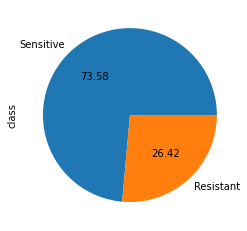

In [27]:
# Show pie plot
y.value_counts().plot.pie(autopct='%.2f')

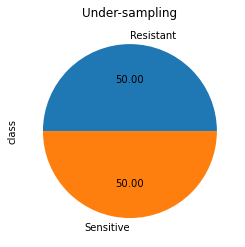

In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [29]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X_res)
#X2.shape
X2 = X_res.loc[:, fs.get_support()]
X2

Sequence  charge at pH =7  Molecular Weight  Hydrophobicity  \
0            1        10.750833        17749.5364       -0.147879   
1            2         5.640334        21796.1189        1.069802   
2            3         2.681455        22524.9949        1.000990   
3            4         3.692047        22615.1605        0.987624   
4            5         3.680456        22493.0392        1.024257   
...        ...              ...               ...             ...   
1658      1659         7.837082        63410.3332       -0.169821   
2630      2631        28.202573        63965.8521       -0.354234   
558        559        -9.199869        36746.9826        0.120659   
197        198        -4.311717        20364.2379       -0.052717   
2448      2449       -12.341196        20742.3830        0.088360   

      Isoelectric Point  Instability Index  MEC_reduced cysteines  \
0              9.873800          18.701818                      0   
1              9.386226          33.470297                  23950   
2              9.297840          38.753515                   9970   
3              9.690968          41.722327                   9970   
4              9.513164          37.590644                   9970   
...                 ...                ...                    ...   
1658           8.871897          51.514321                  45840   
2630           9.637008          49.801081                  61770   
558            5.820904          54.920659                  29910   
197            5.324018          27.340217                  26470   
2448           4.377421          46.120106                  25440   

      MEC_disulfid bridges  
0                      125  
1                    24200  
2                     9970  
3                     9970  
4                     9970  
...                    ...  
1658                 46090  
2630                 62270  
558                  30285  
197                  26595  
2448                 25690  

[2128 rows x 8 columns]

In [30]:
# Encoding the Y class label
y_res = y_res.map({"Resistant": 1, "Sensitive": 0})

In [31]:
X2.to_csv('features_list.csv', index = False)

**Train the model**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



X_train, X_test, y_train, y_test = train_test_split(X2, y_res, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)




In [33]:
X_test

Sequence  charge at pH =7  Molecular Weight  Hydrophobicity  \
282        283         5.103053        25732.1049       -0.425571   
109        110        15.657621        11420.4184       -0.548485   
2802      2803       -16.081931        31947.4535       -0.602439   
988        989        -2.295075        21837.7178       -0.504787   
1464      1465         0.599824        17734.7146       -0.489937   
...        ...              ...               ...             ...   
305        306         2.353328        36228.5424        0.104192   
973        974        -2.279910        18297.7594       -0.427044   
611        612         5.654156        17660.1801       -0.500000   
844        845        -2.560563        41245.9520       -0.031781   
192        193         2.906681        26435.0395       -0.321875   

      Isoelectric Point  Instability Index  MEC_reduced cysteines  \
282            8.986329          50.477169                  48360   
109           10.727040          46.486869                   5500   
2802           4.913072          70.940767                   9970   
988            5.869388          69.679840                  14440   
1464           8.030392          50.527673                   5960   
...                 ...                ...                    ...   
305            8.189306          28.841317                  24410   
973            5.863249          52.641509                   9970   
611            9.144212          45.845455                   5960   
844            6.419021          45.827123                  25900   
192            8.511197          39.078616                  61880   

      MEC_disulfid bridges  
282                  48610  
109                   5625  
2802                 10220  
988                  14565  
1464                  5960  
...                    ...  
305                  24785  
973                   9970  
611                   6210  
844                  26275  
192                  62130  

[426 rows x 8 columns]

In [34]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

**Model Evaluation**

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUROC: {roc_auc:.2f}")

Accuracy: 0.78
Precision: 0.84
Recall: 0.78
F1-score: 0.77
AUROC: 0.77


**Save Model as Pickle Object**

In [36]:
# pickle.dump(model, open('amr_prediction_model.pkl', 'wb'))
import pickle

with open('amr_predict_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [18]:
streamlit run amr_app.py